# Coleta de Dados GeoEspaciais do Brasil

# Dados Coletados

- **Região Brasil:** brasil.zip
- **Regiões Intermediárias:** rga.zip
- **Regiões Imediatas** rgi.zip
- **Mesoregiões** rgme.zip
- **Microregiões** rgmi.zip
- **Unidades da Federação (Estados)** uf.zip
- **Municipios** mun.zip

In [1]:
from datetime import datetime

import requests

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10,10]

In [2]:
arquivos = {
    'brasil': 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Pais_2021.zip',
    'rga':'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_RG_Intermediarias_2021.zip',
    'rgi':'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_RG_Imediatas_2021.zip',
    'rgme':'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Mesorregioes_2021.zip',
    'rgmi':'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Microrregioes_2021.zip',
    'uf': 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip',
    'mun': 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Municipios_2021.zip'
}

In [3]:
for i in arquivos:
    arquivo = i+".zip"
    remote_url = arquivos[i]
    
    print("Coletando: "+remote_url)
    data = requests.get(remote_url)
    with open("./input/"+arquivo, 'wb') as file:
        file.write(data.content)

Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Pais_2021.zip
Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_RG_Intermediarias_2021.zip
Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_RG_Imediatas_2021.zip
Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Mesorregioes_2021.zip
Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Microrregioes_2021.zip
Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip
Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipai

## Unidades Federais

In [5]:
df = gpd.read_file('zip://inputs/uf.zip')
df.head()

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."


<AxesSubplot:>

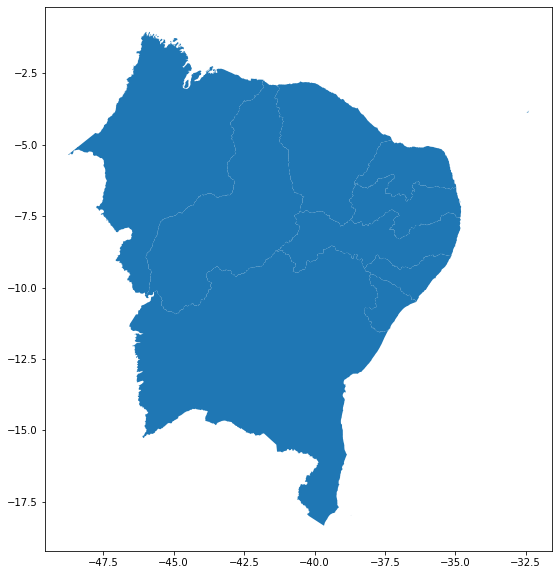

In [8]:
df[df['NM_REGIAO']=='Nordeste'].plot()

## Municipios

In [10]:
df = gpd.read_file('zip://inputs/mun.zip')
df.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


<AxesSubplot:>

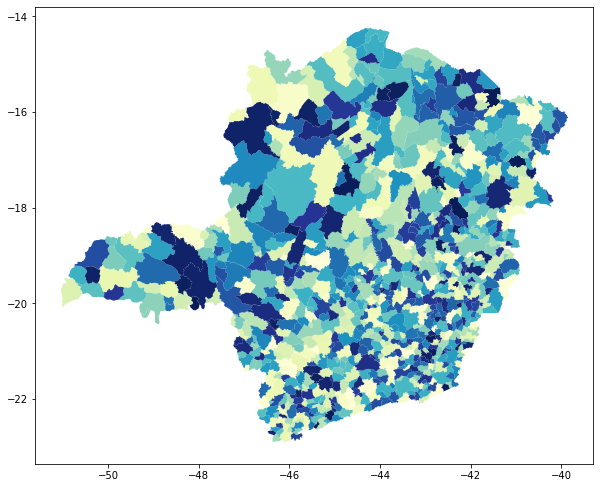

In [11]:
df[df['SIGLA']=='MG'].plot(column="NM_MUN",cmap="YlGnBu")
